In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SK', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

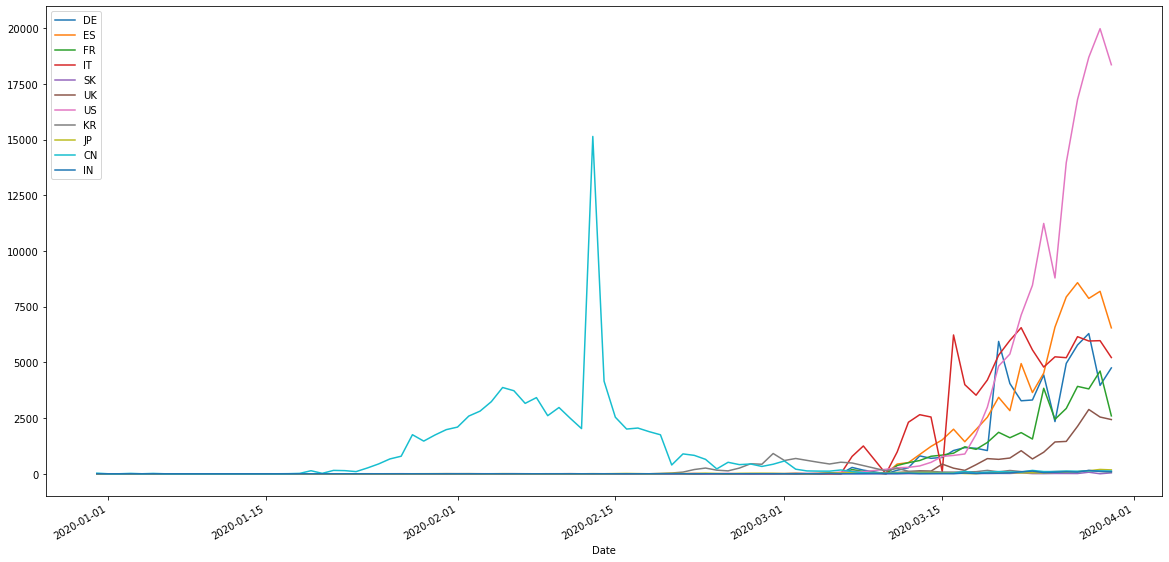

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 10))

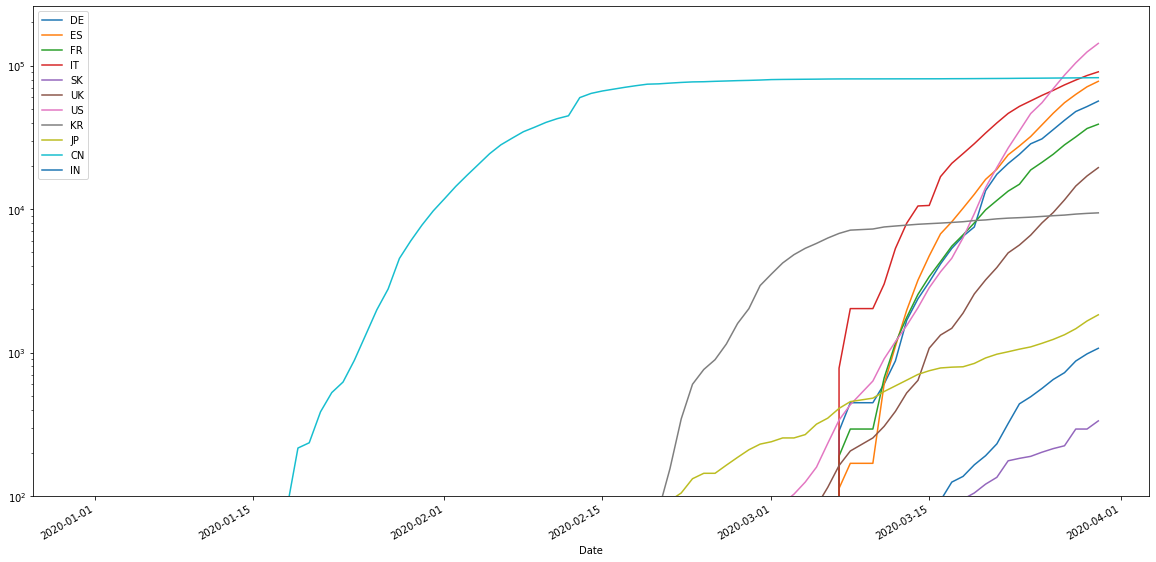

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 10), ylim=(100, None))

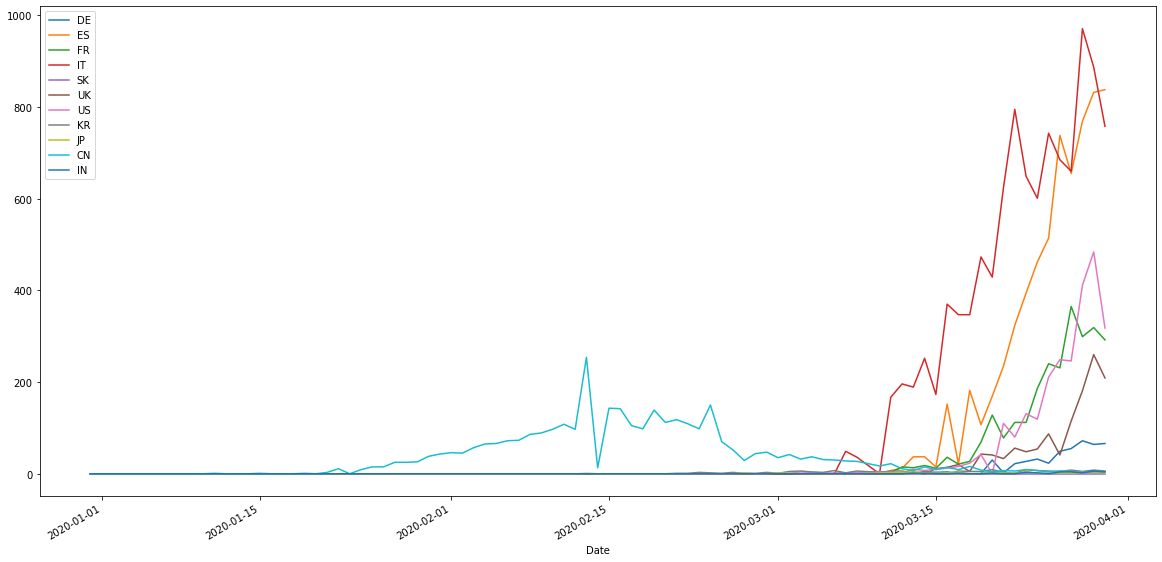

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 10))

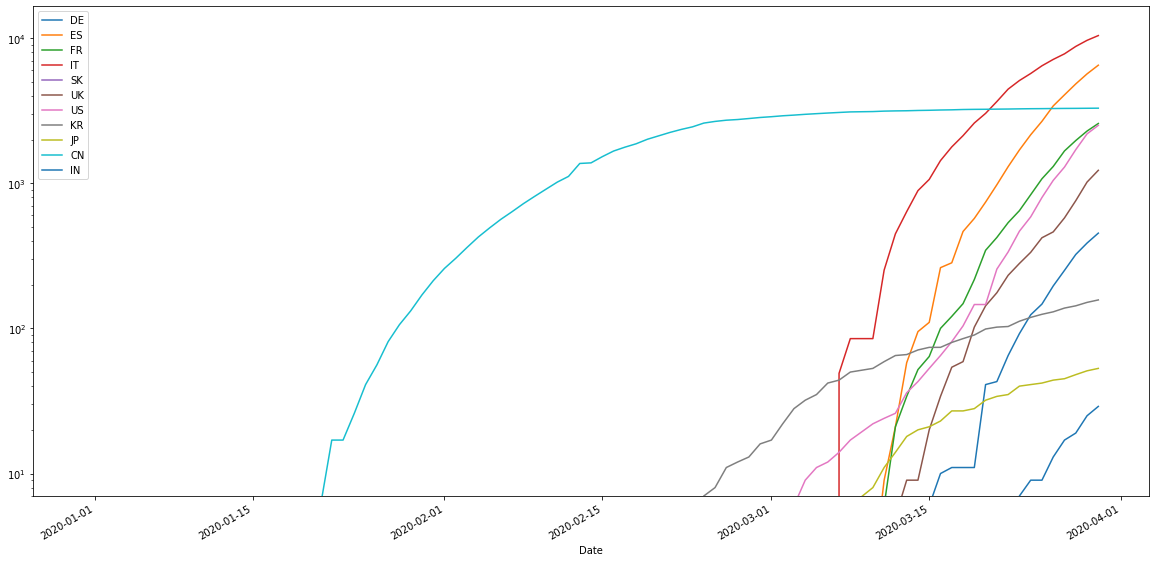

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 10), ylim=(7, None))

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
14,2020-03-16,1043.0,2000.0,924.0,6230.0,17.0,251,823,74,34,25,3
13,2020-03-17,1174.0,1438.0,1210.0,4000.0,23.0,152,887,84,10,110,32
12,2020-03-18,1144.0,1987.0,1097.0,3526.0,13.0,407,1766,93,5,33,12
11,2020-03-19,1042.0,2538.0,1404.0,4207.0,10.0,680,2988,152,44,75,28
10,2020-03-20,5940.0,3431.0,1861.0,5322.0,16.0,647,4835,87,77,99,26
9,2020-03-21,4049.0,2833.0,1617.0,5986.0,14.0,706,5374,147,57,79,40
8,2020-03-22,3276.0,4946.0,1847.0,6557.0,41.0,1035,7123,98,39,83,89
7,2020-03-23,3311.0,3646.0,1559.0,5560.0,7.0,665,8459,64,43,150,119
6,2020-03-24,4438.0,4517.0,3838.0,4789.0,6.0,967,11236,76,39,99,53
5,2020-03-25,2342.0,6584.0,2446.0,5249.0,13.0,1427,8789,100,65,99,70


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-03-16,4146.0,6718.0,4304.0,16833.0,59.0,1324.0,3653.0,7988.0,781.0,80975.0,93.0
2020-03-17,5320.0,8156.0,5514.0,20833.0,82.0,1476.0,4540.0,8072.0,791.0,81085.0,125.0
2020-03-18,6464.0,10143.0,6611.0,24359.0,95.0,1883.0,6306.0,8165.0,796.0,81118.0,137.0
2020-03-19,7506.0,12681.0,8015.0,28566.0,105.0,2563.0,9294.0,8317.0,840.0,81193.0,165.0
2020-03-20,13446.0,16112.0,9876.0,33888.0,121.0,3210.0,14129.0,8404.0,917.0,81292.0,191.0
2020-03-21,17495.0,18945.0,11493.0,39874.0,135.0,3916.0,19503.0,8551.0,974.0,81371.0,231.0
2020-03-22,20771.0,23891.0,13340.0,46431.0,176.0,4951.0,26626.0,8649.0,1013.0,81454.0,320.0
2020-03-23,24082.0,27537.0,14899.0,51991.0,183.0,5616.0,35085.0,8713.0,1056.0,81604.0,439.0
2020-03-24,28520.0,32054.0,18737.0,56780.0,189.0,6583.0,46321.0,8789.0,1095.0,81703.0,492.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
14,2020-03-16,4.0,152.0,36.0,370.0,0.0,14,12,0,2,14,0
13,2020-03-17,1.0,21.0,21.0,347.0,0.0,20,16,6,4,9,1
12,2020-03-18,0.0,182.0,27.0,347.0,0.0,5,23,5,0,16,0
11,2020-03-19,0.0,107.0,69.0,473.0,0.0,43,42,5,1,8,0
10,2020-03-20,30.0,169.0,128.0,429.0,0.0,41,0,9,4,4,1
9,2020-03-21,2.0,235.0,78.0,625.0,0.0,33,110,3,2,7,0
8,2020-03-22,22.0,324.0,112.0,795.0,0.0,56,80,1,1,6,0
7,2020-03-23,27.0,394.0,112.0,649.0,0.0,48,131,9,5,9,3
6,2020-03-24,32.0,462.0,186.0,601.0,0.0,54,119,7,1,7,2
5,2020-03-25,23.0,514.0,240.0,743.0,0.0,87,211,6,1,4,0


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-03-16,10.0,262.0,100.0,1432.0,0.0,34.0,65.0,74.0,23.0,3194.0,2.0
2020-03-17,11.0,283.0,121.0,1779.0,0.0,54.0,81.0,80.0,27.0,3203.0,3.0
2020-03-18,11.0,465.0,148.0,2126.0,0.0,59.0,104.0,85.0,27.0,3219.0,3.0
2020-03-19,11.0,572.0,217.0,2599.0,0.0,102.0,146.0,90.0,28.0,3227.0,3.0
2020-03-20,41.0,741.0,345.0,3028.0,0.0,143.0,146.0,99.0,32.0,3231.0,4.0
2020-03-21,43.0,976.0,423.0,3653.0,0.0,176.0,256.0,102.0,34.0,3238.0,4.0
2020-03-22,65.0,1300.0,535.0,4448.0,0.0,232.0,336.0,103.0,35.0,3244.0,4.0
2020-03-23,92.0,1694.0,647.0,5097.0,0.0,280.0,467.0,112.0,40.0,3253.0,7.0
2020-03-24,124.0,2156.0,833.0,5698.0,0.0,334.0,586.0,119.0,41.0,3260.0,9.0
